In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# ML and stats tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from scipy import stats

In [12]:
# 1. Load dataset
df = pd.read_csv("OrderedLogit.csv")

In [13]:
df

,S no,Performance,Information sharing,Trust,Mutuality,Collective action,Age,Experience in farming,Land holding size (ha),Annual Income
0,1,4,29,44,39,12,55,25,3.0,800000
1,2,4,34,44,35,17,41,18,1.0,233000
2,3,4,43,44,25,32,39,10,2.0,237400
3,4,4,38,51,27,24,45,19,8.0,115550
4,5,4,35,44,31,25,48,20,6.0,288000
...,...,...,...,...,...,...,...,...,...,...
475,476,1,20,29,22,4,55,16,1.0,22000
476,477,1,20,37,17,7,34,9,1.2,27000
477,478,1,24,32,19,11,60,27,2.2,41250
478,479,1,30,34,25,12,55,19,2.4,32000


In [8]:
df[df.duplicated()]

,S no,Performance,Information sharing,Trust,Mutuality,Collective action,Age,Experience in farming,Land holding size (ha),Annual Income


In [14]:
# 2. Basic Info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S no                    480 non-null    int64  
 1   Performance             480 non-null    int64  
 2   Information sharing     480 non-null    int64  
 3   Trust                   480 non-null    int64  
 4   Mutuality               480 non-null    int64  
 5   Collective action       480 non-null    int64  
 6   Age                     480 non-null    int64  
 7   Experience in farming   480 non-null    int64  
 8   Land holding size (ha)  480 non-null    float64
 9   Annual Income           480 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 37.6 KB
None
             S no  Performance  Information sharing       Trust   Mutuality  \
count  480.000000     480.0000           480.000000  480.000000  480.000000   
mean   240.500000       2.5000            29.

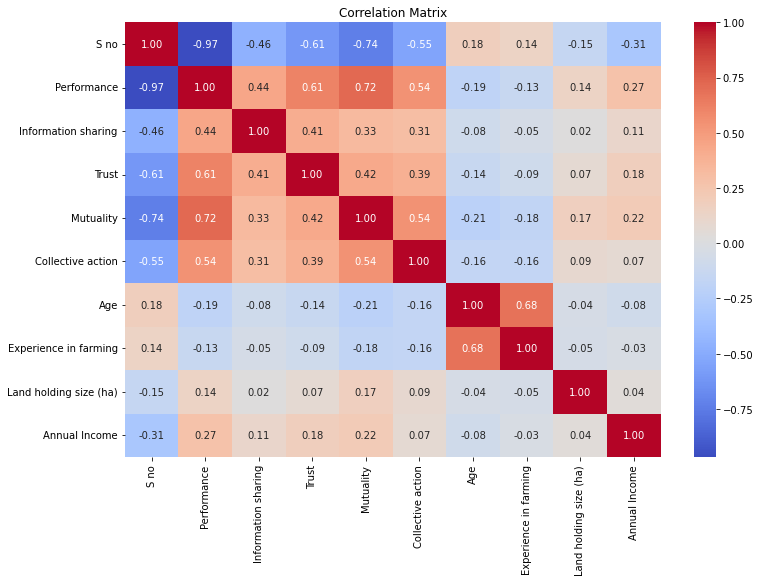

In [15]:
# 3. Check for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [16]:
# 4. Hypothesis Testing (example: Trust vs Performance)
print("Trust by Performance levels:")
for level in sorted(df['Performance'].unique()):
    trust_vals = df[df['Performance'] == level]['Trust']
    print(f"Performance = {level}: mean = {trust_vals.mean():.2f}, std = {trust_vals.std():.2f}")

Trust by Performance levels:
Performance = 1: mean = 30.76, std = 4.20
Performance = 2: mean = 34.02, std = 4.92
Performance = 3: mean = 39.17, std = 4.80
Performance = 4: mean = 41.47, std = 7.19


In [17]:
# ANOVA test across performance levels
anova_result = stats.f_oneway(*(df[df['Performance'] == val]['Trust'] for val in df['Performance'].unique()))
print("\nANOVA Result for Trust ~ Performance:", anova_result)


ANOVA Result for Trust ~ Performance: F_onewayResult(statistic=97.20339965726163, pvalue=4.3620726841032426e-49)


In [18]:
# 5. Prepare data
X = df.drop(columns=['Performance', 'S no'])  # features
y = df['Performance']                         # target

In [19]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:

# 6. Classifiers to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}

In [31]:
# 7. Train & evaluate each model
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.6875
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.73      0.83        26
           2       0.57      0.74      0.64        23
           3       0.53      0.44      0.48        18
           4       0.71      0.76      0.73        29

    accuracy                           0.69        96
   macro avg       0.69      0.67      0.67        96
weighted avg       0.71      0.69      0.69        96


Model: Random Forest
Accuracy: 0.6770833333333334
Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.65      0.76        26
           2       0.52      0.65      0.58        23
           3       0.44      0.44      0.44        18
           4       0.83      0.86      0.85        29

    accuracy                           0.68        96
   macro avg       0.67      0.65      0.66        96
weighted avg       0.70      0.68      0.